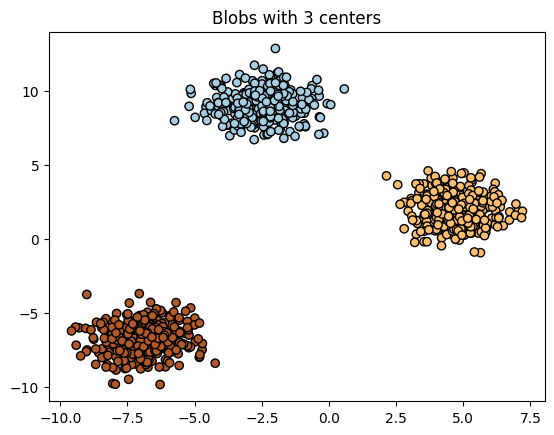

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def plot_blobs(n_samples=1000, n_centers=2, n_features=2, random_state=42):
    # Crear datos con make_blobs
    x, gt = make_blobs(n_samples=n_samples, centers=n_centers, n_features=n_features, random_state=random_state)
    
    # Ajustar el tamaño de la variable gt
    gt = gt.reshape((len(gt), 1))
    
    # Graficar los puntos
    plt.scatter(x[:, 0], x[:, 1], c=gt, cmap=plt.cm.Paired, edgecolors='k', marker='o')
    plt.title(f'Blobs with {n_centers} centers')
    plt.show()

# Ejemplo de uso
plot_blobs(n_samples=1000, n_centers=3)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

class PerceptronMulticlass:
    def __init__(self, learning_rate=0.01, n_iters=1000, n_classes=3):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.n_classes = n_classes
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Init parameters for each class
        self.weights = np.zeros((self.n_classes, n_features))
        self.bias = np.zeros(self.n_classes)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(self.weights, x_i) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Convert y to one-hot encoding
                y_true = np.zeros(self.n_classes)
                y_true[y[idx]] = 1

                # Update weights and bias for each class
                for i in range(self.n_classes):
                    update = self.lr * (y_true[i] - y_predicted[i])
                    self.weights[i] += update * x_i
                    self.bias[i] += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights.T) + self.bias
        return np.argmax(self.activation_func(linear_output), axis=1)

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def decision_boundary(self, x):
        # Asume 2D input, calcula la línea de decisión para cada clase
        return [-(self.weights[i][0] * x + self.bias[i]) / self.weights[i][1] for i in range(self.n_classes)]

    def plot_decision_boundary(self, X, y, title="Perceptron Decision Boundary"):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')

        # Definir el rango del gráfico
        x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
        y_min, y_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()


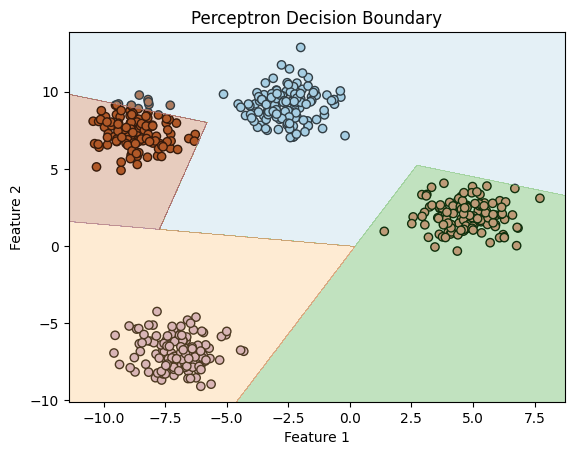

In [5]:
from sklearn.datasets import make_blobs

# Crear datos de ejemplo con 3 clases (centros)
X, y = make_blobs(n_samples=500, centers=4, n_features=2, random_state=42)

# Crear y entrenar el perceptrón
perceptron = PerceptronMulticlass(learning_rate=0.01, n_iters=1000, n_classes=4)
perceptron.fit(X, y)

# Graficar el límite de decisión
perceptron.plot_decision_boundary(X, y)


In [11]:
# Punto nuevo para predecir su clase
new_point = np.array([-10, 5])

# Predecir la clase del nuevo punto
predicted_class = perceptron.predict(new_point.reshape(1, -1))
predicted_class

array([3], dtype=int64)